Fashion Forward is a new AI-based e-commerce clothing retailer.
They want to use image classification to automatically categorize new product listings, making it easier for customers to find what they're looking for. It will also assist in inventory management by quickly sorting items.

As a data scientist tasked with implementing a garment classifier, your primary objective is to develop a machine learning model capable of accurately categorizing images of clothing items into distinct garment types such as shirts, trousers, shoes, etc.

In [1]:
from tensorflow.keras import datasets, layers, models, Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


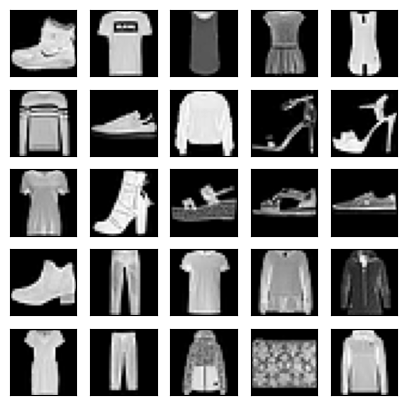

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255.0, cmap='gray')
plt.show()

In [4]:
#Data Preprocessing
## Normalize pixel values (between 0 and 1)
train_images, test_images = train_images / 255.0, test_images / 255.0

## Reshape the images (add the channel dimension)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

## One-hot encode (labels)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model for a single epoch
model.fit(train_images, train_labels, epochs=1, batch_size=64)

938/938 [==============================] - 59s 62ms/step - loss: 0.4540 - accuracy: 0.8390


In [8]:
# Evaluate the model on test images
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.3574 - accuracy: 0.8714


In [9]:
# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.871399998664856
